# Desafio 1

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('default_credit.csv').drop(columns='index')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


# Desafio 2

<AxesSubplot:xlabel='student', ylabel='balance'>

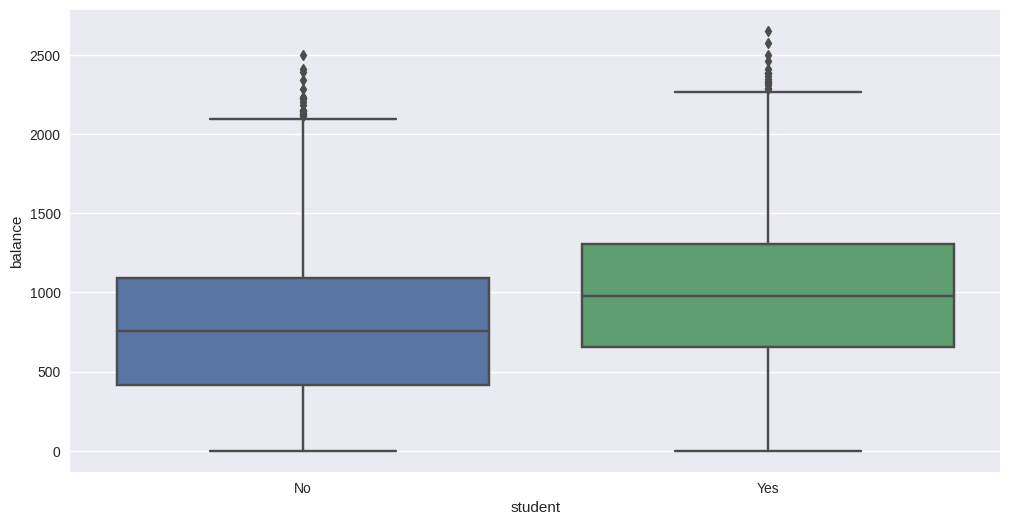

In [2]:
sns.boxplot(data=df, x='student', y='balance')
# Se pudo observar que los clientes y estudiantes y no estudiantes presentan una 
# distribucion de saldos restantes similares. Ademas, los estudiantes presentan una mediana mayor
# que los no estudiantes.

<AxesSubplot:xlabel='student', ylabel='income'>

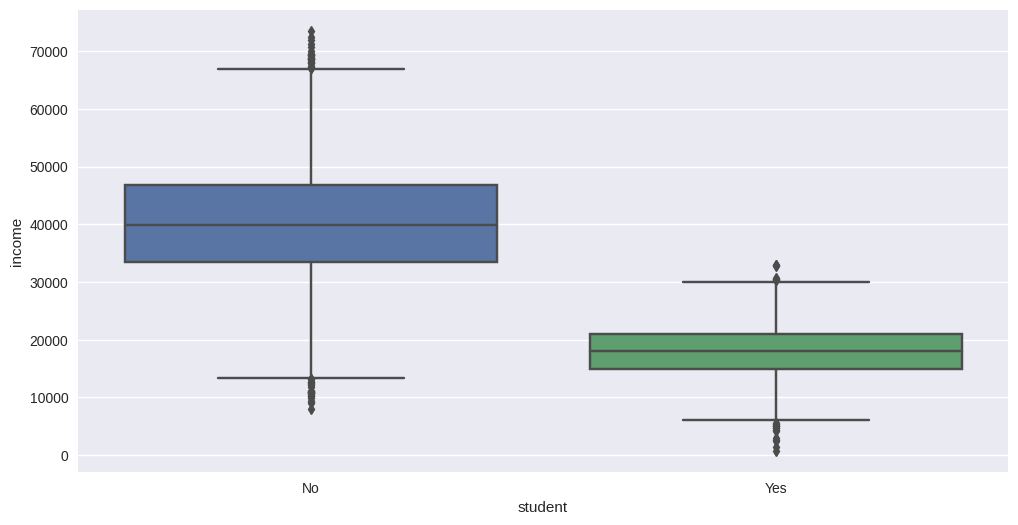

In [3]:
sns.boxplot(data=df, x='student', y='income')

# Los clientes no estudiantes presentan una mediana de income mayor a los clientes estudiantes.
# Ademas, los datos de los no estudiantes tienen una mayor dispersion que los estudiantes.

<AxesSubplot:xlabel='default', ylabel='balance'>

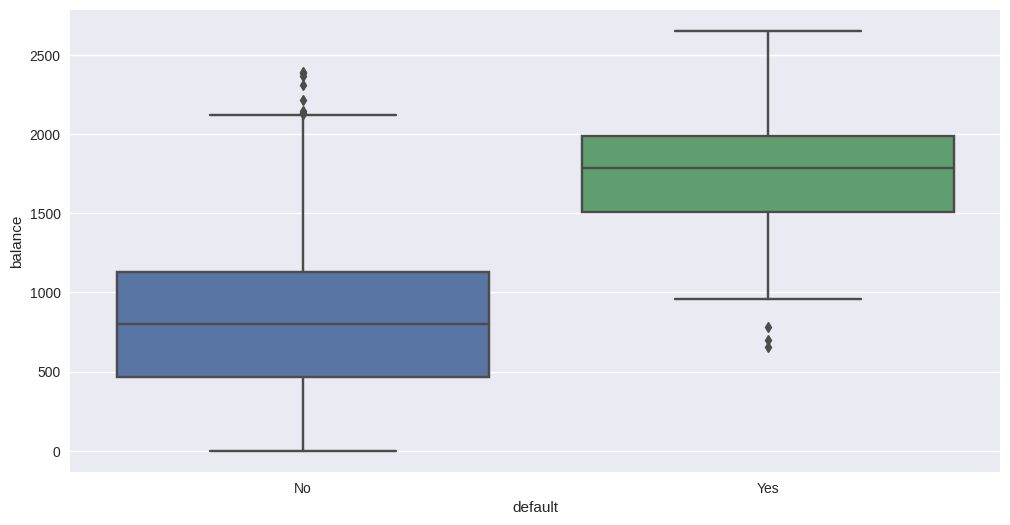

In [4]:
sns.boxplot(data=df, x='default', y='balance')
# Los clientes no morosos presentan una mediana de balance menor que los morosos. Ademas, los
# clientes no morosos presentan una dispersion en balance mayor que lo clientes morosos.

<AxesSubplot:xlabel='default', ylabel='income'>

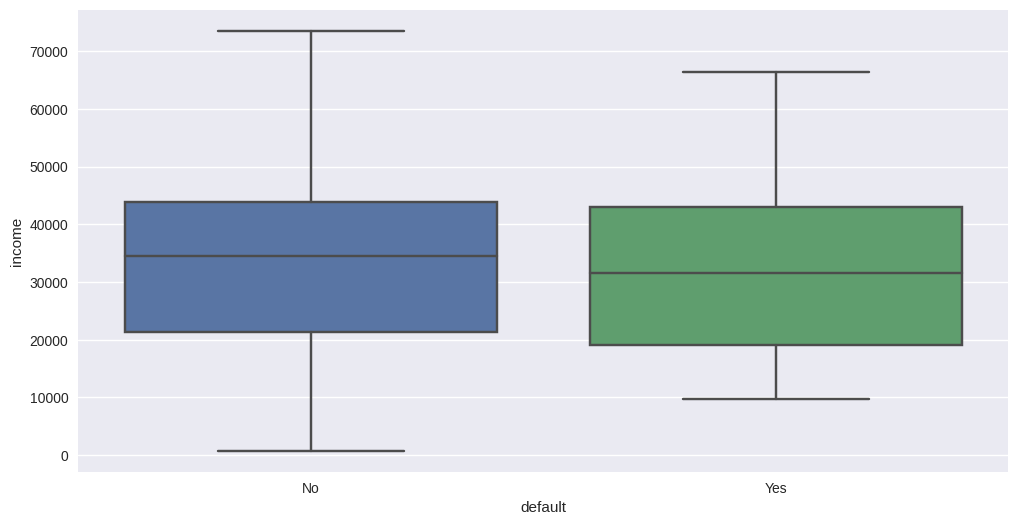

In [5]:
sns.boxplot(data=df, x='default', y='income')
# Los clientes morosos y los no morosos presentan una mediana y una dispersion similar entre
# ellos. Esto podria sugerir que la cantidad de ingresos no tiene relacion con el estado de morosidad.


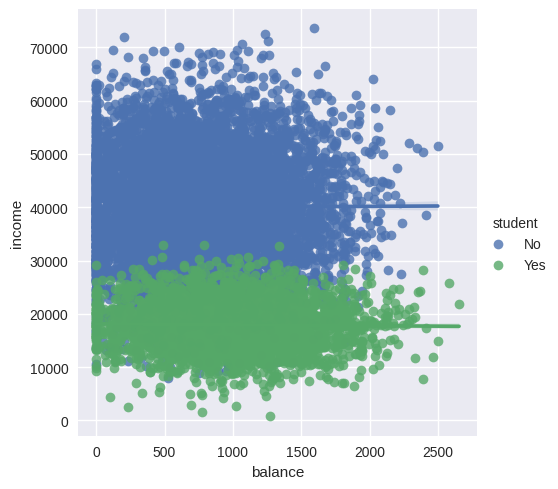

In [6]:
sns.lmplot(data=df, x='balance', y='income', hue='student')
# De forma general, se observa que no existe una relacion muy fuerte entre balance e income.
# Lo anterior se cumple tanto para estudiantes como no estudiantes.
# Ademas, los no estudiantes presentan una mayor cantidad de ingresos que los estudiantes.

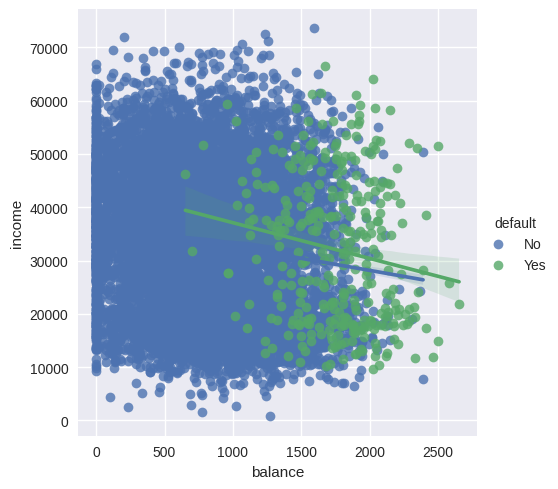

In [7]:
sns.lmplot(data=df, x='balance', y='income', hue='default')
# En el grafico se puede apreciar una relacion negativa entre balance e income (mayor balance,
# menor income). Esta relacion se puede observar tanto para clientes morosos como no morosos. Sin
# embargo, en los clientes morosos se puede ver una relacion negativa mas prominente.

# Desafio 3

In [8]:
df = df.replace({'Yes': 1, 'No': 0})

In [9]:
modelo = smf.logit('default ~ balance + income + student', df).fit()
modelo.summary()

# Segun los resultados, todas las variables influyen en default exceptuando income

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4619
Time:                        12:29:18   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
modelo_depurado = smf.logit('default ~ balance + student', df).fit()
modelo_depurado.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4619
Time:                        12:29:20   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
print(f'El valor maximo que puede tomar balance es: {0.0057 / 4}')
print(f'El valor maximo que puede tomar student es: {-0.7149 / 4}')

El valor maximo que puede tomar balance es: 0.001425
El valor maximo que puede tomar student es: -0.178725


In [12]:
# Con los resultados anteriores, se pudo observar que la cantidad de saldo del usuario (balance)
# aumenta la probabilidad de entrar en morosidad. Por otro lado, si el usuario es un estudiante,
# entonces disminuye la probabilida de que entre en morosidad

# Desafio 4

In [13]:
X = df.drop(columns='default')
y = df['default']

X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [14]:
scaler = StandardScaler().fit(X_train_pre)

X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

In [15]:
modelo = LogisticRegression().fit(X_train, y_train)

In [16]:
yhat = modelo.predict(X_test)
yhat_prob = modelo.predict_proba(X_test)[:, 1]

In [17]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3200
           1       0.70      0.37      0.48       100

    accuracy                           0.98      3300
   macro avg       0.84      0.68      0.74      3300
weighted avg       0.97      0.98      0.97      3300



Text(0, 0.5, 'Ratio de Verdaderos Positivos')

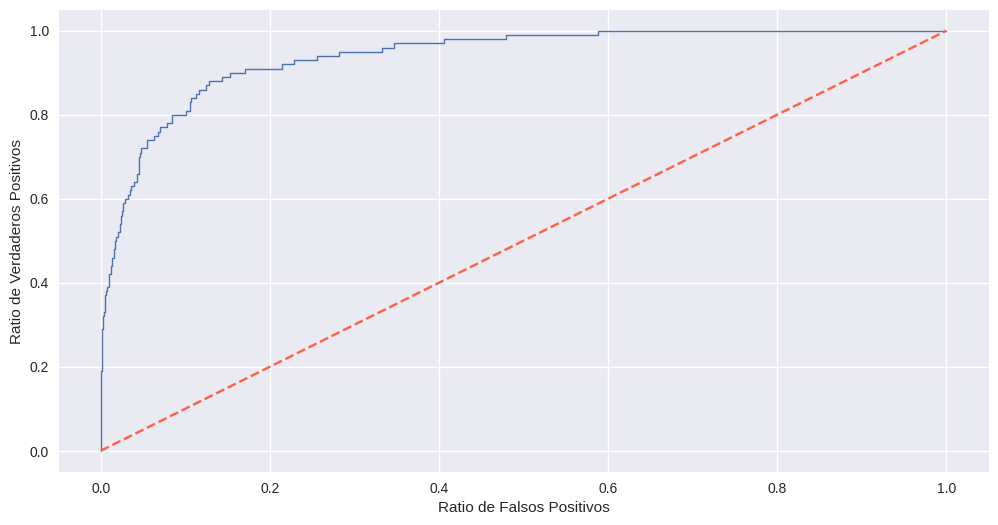

In [27]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat_prob)
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], linestyle='--', color='tomato')
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')

In [29]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, yhat_prob)
auc

0.93994375

# Summary

- Los resultados obtenidos muestran que el conjunto de testeo presentaba 3200 clientes NO morosos (0) y 100 clientes morosos (1).

- De los clientes no morosos, el modelo pudo predecir correctamente el 98% de los Verdaderos Positivos (metrica precision), teniendo solamente un 2% de Falsos Negativos. Por otro lado, dentro de los clientes no morosos, el 99% de los casos fueron predichos correctamente (metrica recall) y solamente un 1% de los casos resulto en un falso positivo.

- De los clientes morosos, el modelo pudo predecir correctamente el 70% de los Verdaderos Positivos, clasificando un 30% de los datos como Falsos Negativos. Por otro lado, dentro de los clientes morosos, el 37% de los casos fueron predichos correctamente y el 63% resulto ser un falso positivo.

- Finalmente, el modelo clasifico correctamente el 98% de los verdaderos positivos y verdaderos negativos (metrica accuracy).

# Curva ROC

- Uno de los mejores puntos de corte que se encontro en la curva fue el ~(0.18, 0.9). Significando que en ese punto de corte, se obtendria un 18% de Falsos Positivos (falsas alarmas) y un 90% de verdaderos positivos.

- Si se quiere aumentar la cantidad de verdaderos positivos, se debe estar dispuesto a aumentar la cantidad de falsas alarmas a reportar.

- El modelo tuvo un Area Bajo la Curva de ~94%, indicando que tuvo un desempeno de 44% mejor que un clasificador aleatorio!

